# Regressions: un premier example

Nous allons essayer de comprendre, dans ce notebook, pourquoi il est difficile de faire de l’apprentissage automatique en general. Notre tâche sera simple: ajuster les données avec des polynômes d’ordre différent. Formellement, cela s'appelle la régression polynomiale. Nous allons faire ici une série d’exercices destinés à donner au lecteur une idée des principaux défis de tout algorithme d’apprentissage automatique.

Nous explorerons comment notre capacité de prévision dépend du nombre de points de données dont nous disposons, du "bruit" dans les données et de notre connaissance des caractéristiques pertinentes. Le but est de construire une intuition sur la raison pour laquelle la prédiction est difficile et de discuter de stratégies générales pour surmonter ces difficultés.

## Le probleme: faire de la prediction

Considérons un processus probabiliste qui donne lieu à des données labelisées $ (x, y) $. Les données sont générées en tirant des échantillons de l'équation
$$
    y_i= f(x_i) + \eta_i,
$$
ou $f(x_i)$ est une fonction fixe, mais (peut-être inconnue), et $ \ eta_i $ est une variable de bruit gaussienne non corrélée telle que
$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
We will refer to the $f^{\rm vraie}(x_i)$ comme etant la "bonne" ou "vraie" fonction.

Pour faire une prédiction, nous allons considérer une famille de fonctions  $g_\alpha(x;\theta_\alpha)$ qui dépendent de certains paramètres   $\theta_\alpha$. Ces fonctions représentent la **classe de modèle** que nous utilisons pour essayer de modéliser les données et de faire des prédictions. Pour apprendre les

Pour apprendre les paramètres $ \boldsymbol {\theta} $, nous allons former nos modèles sur un **jeu de données d'entrainement**, puis tester l'efficacité du modèle sur un jeu de données <i> différent </i>, le **jeu de données de test**. La raison pour laquelle nous devons diviser nos données en un ensemble de données d'apprentissage et de test est que le but de l'apprentissage automatique est de faire des prédictions précises sur de nouvelles données que nous n'avons pas vues. Comme nous le verrons plus loin, les modèles qui correspondent le mieux aux données d'entraînement ne permettent pas nécessairement les meilleures prédictions sur les données de test. Ce sera un thème récurrent que nous rencontrerons à plusieurs reprises dans l’apprentissage automatique.

Nous nous concentrerons aujourd'hui sur la régression polynomiale.

Notre tâche est de modéliser les données avec des polynômes et de faire des prédictions sur les nouvelles données que nous n’avons pas vues.
Nous allons considérer deux situations qualitativement distinctes:
<ul>
<li> Dans le premier cas, le processus qui génère les données sous-jacentes se trouve dans la classe de modèle utilisée pour les prévisions. Pour la régression polynomiale, cela signifie que les fonctions $ f(x_i) $ sont elles-mêmes des polynômes.
<li> Dans le deuxième cas, nos données se situent en dehors de notre classe de modèle. Dans le cas d'une régression polynomiale, cela pourrait correspondre au cas où le $ f (x_i) $ est un polynôme du 10ème ordre mais que $ g_\alpha (x; t
\theta_\alpha) $ sont des polynômes d'ordre 1 ou 3.
</ul>

Dans les exercices et la discussion, nous considérons 3 classes modèles:
<ul>
<li> le cas où les $ g_ \alpha (x; \theta_\alpha) $ sont tous des polynômes allant jusqu'à l'ordre 1 (modèles linéaires),
<li> le cas où les $ g_ \alpha (x; \theta_\alpha) $ sont tous des polynômes allant jusqu'à l'ordre 3,
<li> le cas où les $ g_ \alpha (x; \theta_\alpha) $ sont tous des polynômes jusqu’à l’ordre 10.
</ul>

Pour mesurer notre capacité à prédire, nous allons apprendre nos paramètres en ajustant notre jeu de données d'entrainement, puis en faisant des prédictions sur notre jeu de données de test. Une mesure courante des performances prédictives de notre algorithme consiste à comparer les prédictions, $ \{y_j ^ \mathrm {pred}\} $, aux valeurs vraies $ \{y_j \} $. Une mesure couramment utilisée pour cela est la somme de l'erreur quadratique moyenne (MSE) sur l'ensemble de test:
$$
MSE = \frac {1} {N_\mathrm {test}} \sum_ {j = 1} ^ {N_\mathrm{test}} (y_j ^ \mathrm {pred} -y_j) ^ 2
$$

Nous allons essayer d'obtenir une image qualitative en examinant les graphiques sur les données de test et de formation.

## Erreur d'entrainement et erreur de prediction (fitting vs predicting)

Nous commençons par examiner le cas:
$$
f (x) = 2x.
$$
Ensuite, les données sont clairement générées par un modèle contenu dans les trois classes de modèles que nous utilisons pour faire des prédictions (modèles linéaires, polynômes du troisième ordre et polynômes du dixième ordre).


Exécutez le code pour les cas suivants:
<ul>
<li> Pour $ f (x) = 2x $, $ N _ {\ mathrm {train}} = 10 $ et $ \ sigma = 0 $ (cas sans bruit), formez les trois classes de modèles (polynôme linéaire du troisième ordre et polynôme du dixième ordre) pour un ensemble de formation lorsque $ x_i \ in [0,1] $. Faites des graphiques comparant les ajustements pour différents ordres de polynômes. Quel modèle correspond le mieux aux données?
<li> Pensez-vous que les données qui génèrent le moins d'erreurs sur l'ensemble de formation feront également les meilleures prédictions? Pourquoi ou pourquoi pas? Pouvez-vous essayer de discuter et de formaliser votre intuition? Qu'est-ce qui peut aller bien et qu'est-ce qui peut aller mal?
<li> Vérifiez votre réponse en vérifiant dans quelle mesure vos ajustements prédisent les nouvelles données de test générées (y compris les données situées en dehors de la plage qui vous convient, par exemple $ x \ in [0,1.2] $) à l'aide du code ci-dessous. Dans quelle mesure réussissez-vous sur des points de l'ordre de $ x $ où vous avez formé le modèle? Que diriez-vous des points en dehors du jeu de données d’entraînement original?
<li> Répétez les exercices ci-dessus pour $ f (x) = 2x $, $ N _ {\ mathrm {train}} = 10 $ et $ \ sigma = 1 $. Quels changements?
<li> Répétez les exercices ci-dessus pour $ f (x) = 2x $, $ N _ {\ mathrm {train}} = 100 $ et $ \ sigma = 1 $. Quels changements?
<li> Résumez ce que vous avez appris sur la relation entre la complexité du modèle (nombre de paramètres), la qualité de l'ajustement aux données d'entraînement et la capacité de bien prédire.
</ ul>

## Fitting vs. predicting when the data is not in the model class

Jusqu'ici, nous avons considéré le cas où les données sont générées à l'aide d'un modèle contenu dans la classe de modèle. Considérons maintenant $ f (x) = 2x-10x ^ 5 + 15x ^ {10} $. * Remarquez que le vrai modèle $ f (x) $ n'est pas contenu dans la classe de modèle $ g_ \ alpha (x) $ *.

<ul>
<li> Répétez les exercices ci-dessus pour l'ajustement et la prédiction pour $ f (x) = 2x-10x ^ 5 + 15x ^ {10} $ pour $ N _ {\ mathrm {train}} = 10 100 $ et $ \ sigma = 0,1 $. Notez vos observations.
<li> Est-ce que de meilleurs ajustements conduisent à de meilleures prévisions?
<li> Quelle est la relation entre le modèle réel pour générer les données et la classe de modèle qui a le plus de pouvoir de prédiction? Comment cela est-il lié à la complexité du modèle? Comment cela dépend-il du nombre de points de données $ N _ {\ mathrm {train}} $ et $ \ sigma $?
<li> Résumez ce que vous pensez avoir appris sur la relation entre connaître la véritable classe de modèles et le pouvoir de prévision.



# Entrainement (ou ajustement):

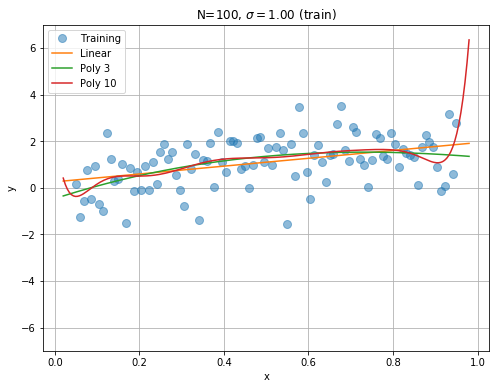

In [6]:
#This is Python Notebook to walk through polynomial regression examples
#We will use this to think about regression
import numpy as np
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams
fig = plt.figure(figsize=(8, 6))

# The Training Data
N_train=100
sigma_train=1;

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#linear
y=2*x+s

# Tenth Order
#y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(x[:, np.newaxis], y)

# Use fitted linear model to predict the y value:
xplot=np.linspace(0.02,0.98,200) # grid of points, some are in the training set, some are not
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")


# Linear Filename
filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Tenth Order Filename
#filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()


# Test des modeles

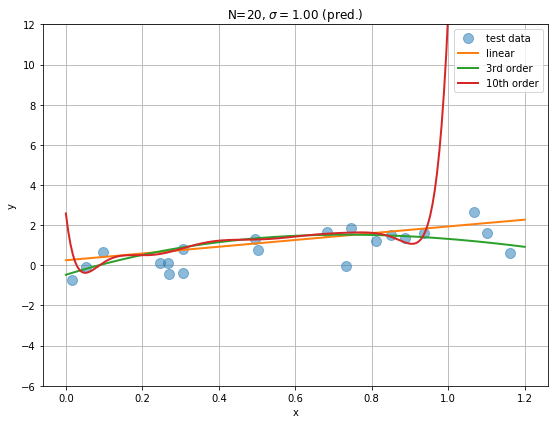

In [7]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=20
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
y_test=2*x_test+s_test
# Tenth order
#y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

# Linear Filename
filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
#filename_test=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()